<a href="https://colab.research.google.com/github/chupig834/Machine-Learning-Projects/blob/main/Kaggle_House_Price1/Kaggle_Beg_House_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [413]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [414]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [415]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [416]:
missing_percent = (train.isnull().sum() / len(train)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


1. Drop records with a lot of missing values

In [417]:
threshold = 0.3
missing_ratio = train.isnull().sum() / len(train)
cols_to_drop = missing_ratio[missing_ratio > threshold].index
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

if GarageYrBlt = null, use the house build date

In [418]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['YearBuilt'])
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['YearBuilt'])

In [419]:
quality_meassure = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond']

for col in quality_meassure:
  train[col] = train[col].fillna('TA')
  test[col] = test[col].fillna('TA')

In [420]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

LotFrontage     259
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64


If the missing fields are values - I will use median to fill it

In [421]:
# #Use the median from training set to prevent data leakage
# num_cols = train.select_dtypes(include=['float64', 'int64']).columns

# print(num_cols)

# for col in num_cols:
#     if train[col].isnull().sum() > 0:
#         median_value = train[col].median()
#         train[col] = train[col].fillna(median_value)
#         test[col] = test[col].fillna(median_value)

# from sklearn.impute import SimpleImputer

# # Select numeric columns
# temp = train.drop(columns=['SalePrice'])  # recommended
# num_cols = temp.select_dtypes(include=['float64', 'int64']).columns

# # Create and fit the imputer on train
# num_imputer = SimpleImputer(strategy='median')
# train[num_cols] = num_imputer.fit_transform(train[num_cols])

# # Apply the same imputer to test (important to avoid data leakage)
# test[num_cols] = num_imputer.transform(test[num_cols])

In [422]:
# obj_cols = train.select_dtypes(include='object').columns

# # Fill missing values in train and test using mode from train
# for col in obj_cols:
#     if train[col].isnull().sum() > 0:
#         mode_val = train[col].mode()[0]
#         train[col] = train[col].fillna(mode_val)
#         test[col] = test[col].fillna(mode_val)  # use train's mode for test

# cat_cols = train.select_dtypes(include='object').columns

# cat_imputer = SimpleImputer(strategy='most_frequent')
# train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])
# test[cat_cols] = cat_imputer.transform(test[cat_cols])

In [423]:
print(train.isnull().sum()[train.isnull().sum() > 0])
print(train.shape)
print(test.shape)

LotFrontage     259
MasVnrArea        8
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageFinish     81
dtype: int64
(1460, 75)
(1459, 74)


Visualization Correlation

In [424]:
correlation_matrix = train.corr(numeric_only=True)

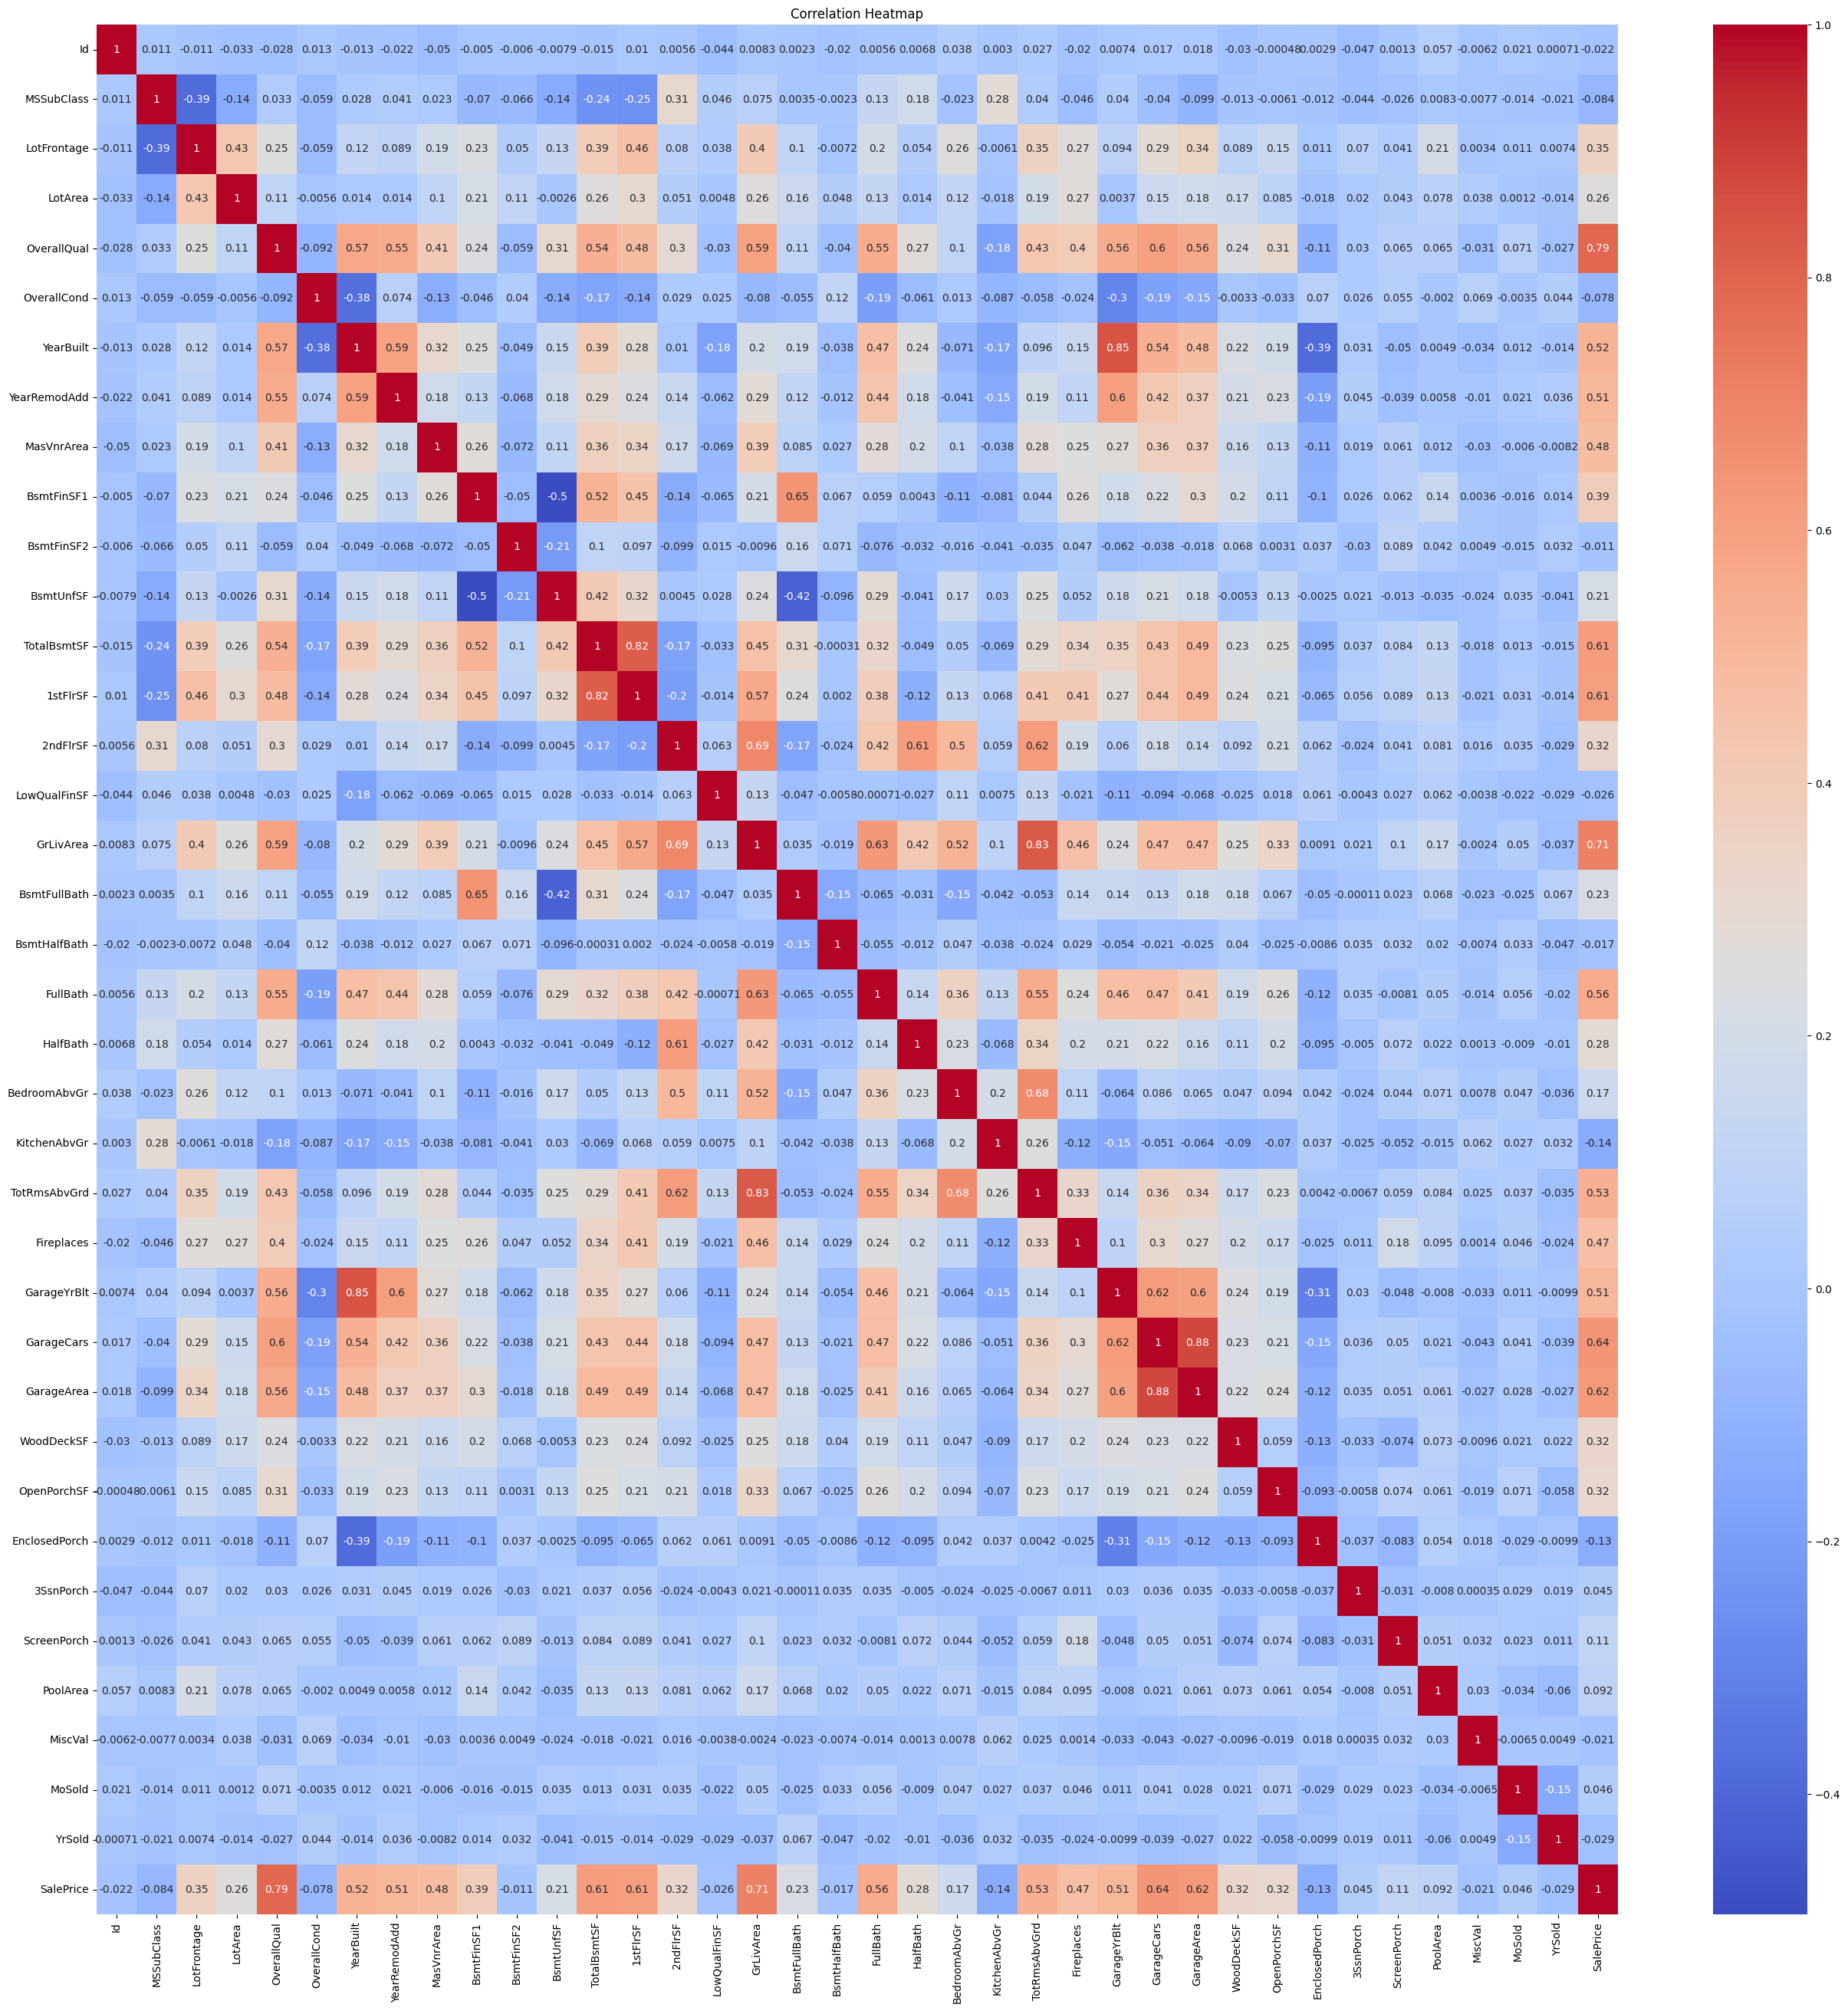

In [425]:
plt.figure(figsize=(32, 32))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [426]:
correlation = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageYrBlt      0.508043
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [427]:
train['TotalBath'] = train['BsmtFullBath'] + train['HalfBath'] * 0.5 + train['FullBath'] + train['BsmtHalfBath'] * 0.5
test['TotalBath'] = test['BsmtFullBath'] + test['HalfBath'] * 0.5 + test['FullBath'] + test['BsmtHalfBath'] * 0.5

In [428]:
train['TotalSF'] = train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']].sum(axis=1)
test['TotalSF'] = test[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']].sum(axis=1)

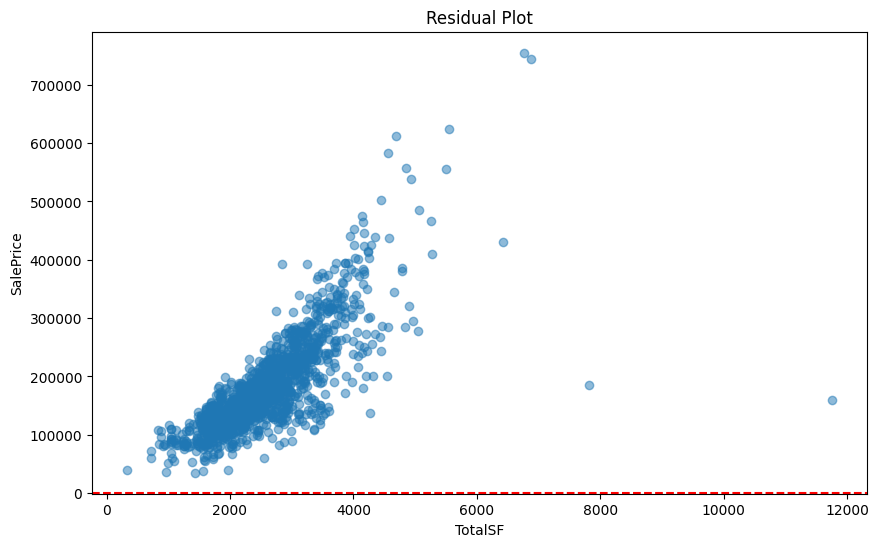

In [429]:
plt.figure(figsize=(10,6))
plt.scatter(train['TotalSF'], train['SalePrice'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')
plt.title('Residual Plot')
plt.show()

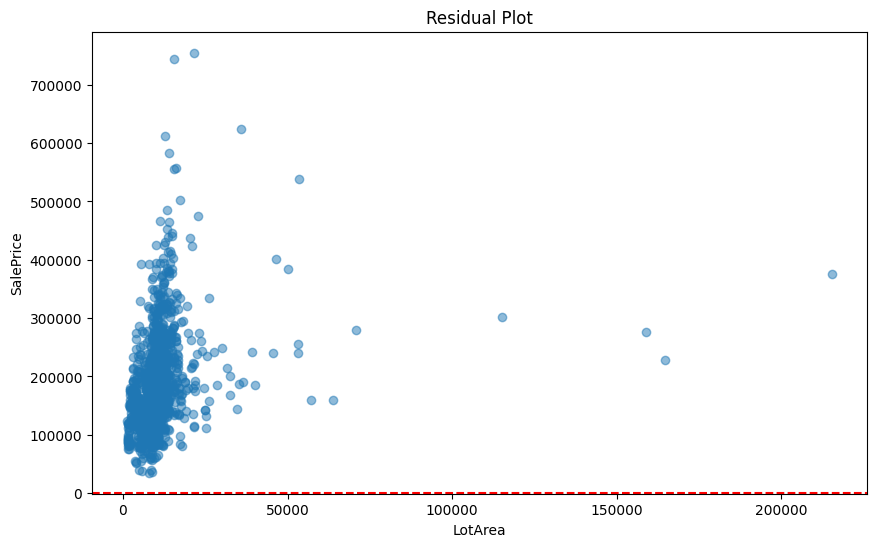

In [430]:
plt.figure(figsize=(10,6))
plt.scatter(train['LotArea'], train['SalePrice'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Residual Plot')
plt.show()

In [431]:
record = (train["SalePrice"] < 250000) & (train["TotalSF"] > 7500)
pd.set_option('display.max_columns', None)
print(train[record])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
523    524          60       RL        130.0    40094   Pave      IR1   
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea  \
523           2008       Hip  CompShg     CemntBd     CmentBd       762.0   
1298          2008       Hip  ClyTile      Stucco      Stucco       796.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
523         Ex        TA  

In [432]:
#Dropping Outlier
train = train.drop(index=[523, 1298])

In [433]:
# #Use the median from training set to prevent data leakage
# num_cols = train.select_dtypes(include=['float64', 'int64']).columns

# print(num_cols)

# for col in num_cols:
#     if train[col].isnull().sum() > 0:
#         median_value = train[col].median()
#         train[col] = train[col].fillna(median_value)
#         test[col] = test[col].fillna(median_value)

from sklearn.impute import SimpleImputer

# Select numeric columns
temp = train.drop(columns=['SalePrice'])  # recommended
num_cols = temp.select_dtypes(include=['float64', 'int64']).columns

# Create and fit the imputer on train
num_imputer = SimpleImputer(strategy='median')
train[num_cols] = num_imputer.fit_transform(train[num_cols])

# Apply the same imputer to test (important to avoid data leakage)
test[num_cols] = num_imputer.transform(test[num_cols])

In [434]:
# obj_cols = train.select_dtypes(include='object').columns

# # Fill missing values in train and test using mode from train
# for col in obj_cols:
#     if train[col].isnull().sum() > 0:
#         mode_val = train[col].mode()[0]
#         train[col] = train[col].fillna(mode_val)
#         test[col] = test[col].fillna(mode_val)  # use train's mode for test

cat_cols = train.select_dtypes(include='object').columns

cat_imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])
test[cat_cols] = cat_imputer.transform(test[cat_cols])

Transform Object features into values

In [435]:
X = train.drop(['SalePrice'], axis=1)
X_encoded = pd.get_dummies(X)  # converts all object columns to 0/1 columns

y = train['SalePrice']

print(X.shape)
print(test.shape)

(1458, 76)
(1459, 76)


Split train into train and validation sets

In [436]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [437]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False).head(20))

OverallQual             0.279099
TotalSF                 0.163556
CentralAir_N            0.059008
KitchenAbvGr            0.054546
TotalBath               0.033406
KitchenQual_Gd          0.030484
BsmtQual_Ex             0.029725
GarageCars              0.024778
LotShape_Reg            0.022420
GarageType_Detchd       0.016477
Fireplaces              0.014386
KitchenQual_Ex          0.014219
BsmtExposure_Gd         0.014139
GarageFinish_Unf        0.013618
MSZoning_RM             0.012464
TotRmsAbvGrd            0.011350
Neighborhood_Crawfor    0.008944
2ndFlrSF                0.008924
LandSlope_Mod           0.008835
SaleType_New            0.007924
dtype: float32


In [438]:
xgb_model = XGBRegressor(
    subsample=0.8,
    reg_lambda=0.5,
    reg_alpha=0.5,
    n_estimators=500,
    max_depth=3,
    learning_rate=0.1,
    colsample_bytree=0.6,
    random_state=42)

In [439]:
xgb_model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False).head(20))

OverallQual             0.279099
TotalSF                 0.163556
CentralAir_N            0.059008
KitchenAbvGr            0.054546
TotalBath               0.033406
KitchenQual_Gd          0.030484
BsmtQual_Ex             0.029725
GarageCars              0.024778
LotShape_Reg            0.022420
GarageType_Detchd       0.016477
Fireplaces              0.014386
KitchenQual_Ex          0.014219
BsmtExposure_Gd         0.014139
GarageFinish_Unf        0.013618
MSZoning_RM             0.012464
TotRmsAbvGrd            0.011350
Neighborhood_Crawfor    0.008944
2ndFlrSF                0.008924
LandSlope_Mod           0.008835
SaleType_New            0.007924
dtype: float32


In [440]:
y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 24732.46
MAE: 16834.14
R² Score: 0.8893


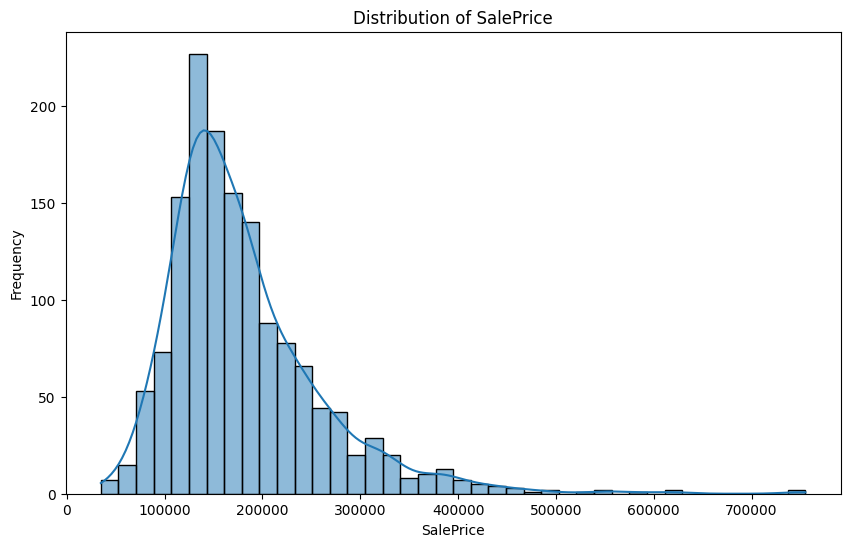

In [441]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=40)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

We notice the data is right skewed. Using log on the predicted value might help

This looks like XGBoost hndles the skewed data pretty well. No change with the log result

Hyperparameter Tunning

In [442]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1.0]
}

xgb = XGBRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 300, 500, 700],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [443]:
print("Best RMSE:", -search.best_score_)
print("Best Parameters:", search.best_params_)

Best RMSE: 23286.40234375
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [444]:
best_model = search.best_estimator_

y_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE with Tuned Model: {rmse:.2f}")

Validation RMSE with Tuned Model: 20197.81


In [445]:
xgb_model = XGBRegressor(
    subsample=0.8,
    reg_lambda=0.5,
    reg_alpha=0.5,
    n_estimators=500,
    max_depth=3,
    learning_rate=0.1,
    colsample_bytree=0.6,
    random_state=42)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE with Tuned Model: {rmse:.2f}")

Validation RMSE with Tuned Model: 19254.41


Model improved, but not enough. We are going to try feature engineering

In [446]:
from sklearn.ensemble import GradientBoostingRegressor

# Train XGBoost
xgb = XGBRegressor(**search.best_params_, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_val)

# Train Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_preds = gbr.predict(X_val)

# Simple average of predictions
ensemble_preds = (xgb_preds + gbr_preds) / 2

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, ensemble_preds))
print(f"Ensemble RMSE: {rmse:.2f}")


Ensemble RMSE: 20236.96


In [447]:
ensemble_preds = 1 * xgb_preds + 0 * gbr_preds
rmse = np.sqrt(mean_squared_error(y_val, ensemble_preds))
print(f"Ensemble RMSE: {rmse:.2f}")

Ensemble RMSE: 20197.81


In [448]:
best_rmse = float('inf')
best_weight = 0

for w in np.arange(0.1, 1.0, 0.1):
    ensemble_preds = w * xgb_preds + (1 - w) * gbr_preds
    rmse = np.sqrt(mean_squared_error(y_val, ensemble_preds))
    if rmse < best_rmse:
        best_rmse = rmse
        best_weight = w

print(f"Best RMSE: {best_rmse:.2f} with XGB weight: {best_weight:.1f}, GBR weight: {1-best_weight:.1f}")


Best RMSE: 20122.24 with XGB weight: 0.8, GBR weight: 0.2


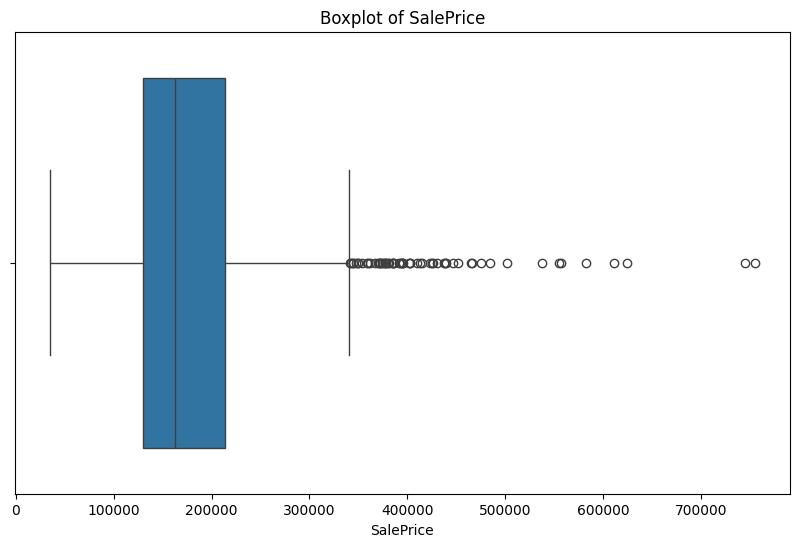

In [449]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

In [450]:
from scipy import stats

# Compute Z-scores for SalePrice
z_scores = np.abs(stats.zscore(train['SalePrice']))
outlier_indices = np.where(z_scores > 3)[0]  # values more than 3 std dev away

# Show outlier records
train.iloc[outlier_indices]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath,TotalSF
58,59.0,60.0,RL,66.0,13682.0,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10.0,5.0,2006.0,2006.0,Hip,CompShg,VinylSd,VinylSd,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1410.0,1410.0,GasA,Ex,Y,SBrkr,1426.0,1519.0,0.0,2945.0,0.0,0.0,3.0,1.0,3.0,1.0,Gd,10.0,Typ,1.0,BuiltIn,2006.0,Fin,3.0,641.0,TA,TA,Y,192.0,0.0,37.0,0.0,0.0,0.0,0.0,10.0,2006.0,New,Partial,438780,3.5,4355.0
178,179.0,20.0,RL,63.0,17423.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9.0,5.0,2008.0,2009.0,Hip,CompShg,VinylSd,VinylSd,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904.0,Unf,0.0,312.0,2216.0,GasA,Ex,Y,SBrkr,2234.0,0.0,0.0,2234.0,1.0,0.0,2.0,0.0,1.0,1.0,Ex,9.0,Typ,1.0,Attchd,2009.0,Fin,3.0,1166.0,TA,TA,Y,0.0,60.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,New,Partial,501837,3.0,4450.0
185,186.0,75.0,RM,90.0,22950.0,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10.0,9.0,1892.0,1993.0,Gable,WdShngl,Wd Sdng,Wd Sdng,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,GasA,Ex,Y,SBrkr,1518.0,1518.0,572.0,3608.0,0.0,0.0,2.0,1.0,4.0,1.0,Ex,12.0,Typ,2.0,Detchd,1993.0,Unf,3.0,840.0,Ex,TA,Y,0.0,260.0,0.0,0.0,410.0,0.0,0.0,6.0,2006.0,WD,Normal,475000,2.5,4143.0
349,350.0,60.0,RL,56.0,20431.0,Pave,IR2,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9.0,5.0,2005.0,2006.0,Hip,CompShg,CemntBd,CmentBd,870.0,Ex,TA,PConc,Ex,TA,No,GLQ,1410.0,Unf,0.0,438.0,1848.0,GasA,Ex,Y,SBrkr,1848.0,880.0,0.0,2728.0,1.0,0.0,2.0,1.0,4.0,1.0,Ex,10.0,Typ,2.0,Attchd,2006.0,Fin,3.0,706.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,New,Partial,437154,3.5,4576.0
389,390.0,60.0,RL,96.0,12474.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10.0,5.0,2007.0,2008.0,Gable,CompShg,VinylSd,VinylSd,272.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1280.0,Unf,0.0,402.0,1682.0,GasA,Ex,Y,SBrkr,1742.0,590.0,0.0,2332.0,1.0,0.0,2.0,1.0,3.0,1.0,Ex,9.0,Typ,1.0,BuiltIn,2008.0,Fin,3.0,846.0,TA,TA,Y,196.0,134.0,0.0,0.0,0.0,0.0,0.0,8.0,2008.0,New,Partial,426000,3.5,4014.0
440,441.0,20.0,RL,105.0,15431.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10.0,5.0,2008.0,2008.0,Hip,CompShg,VinylSd,VinylSd,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,GasA,Ex,Y,SBrkr,2402.0,0.0,0.0,2402.0,1.0,0.0,2.0,0.0,2.0,1.0,Ex,10.0,Typ,2.0,Attchd,2008.0,Fin,3.0,672.0,TA,TA,Y,0.0,72.0,0.0,0.0,170.0,0.0,0.0,4.0,2009.0,WD,Normal,555000,3.0,5496.0
473,474.0,20.0,RL,110.0,14977.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8.0,5.0,2006.0,2007.0,Gable,CompShg,VinylSd,VinylSd,304.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1350.0,Unf,0.0,626.0,1976.0,GasA,Ex,Y,SBrkr,1976.0,0.0,0.0,1976.0,1.0,0.0,2.0,0.0,2.0,1.0,Gd,7.0,Typ,1.0,Attchd,2006.0,RFn,3.0,908.0,TA,TA,Y,250.0,63.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0,New,Partial,440000,3.0,3952.0
496,497.0,20.0,RL,69.0,12692.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8.0,5.0,1992.0,1993.0,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231.0,Unf,0.0,1969.0,3200.0,GasA,Ex,Y,SBrkr,3228.0,0.0,0.0,3228.0,1.0,0.0,3.0,0.0,4.0,1.0,Gd,10.0,Typ,1.0,Attchd,1992.0,RFn,2.0,546.0,TA,TA,Y,264.0,75.0,291.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,430000,4.0,6428.0
527,528.0,60.0,RL,67.0,14948.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Nridg

In [451]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalBath,TotalSF
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.251715,56.893004,69.655693,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.189986,438.827160,46.613169,567.096708,1052.537037,1158.851166,345.762003,5.852538,1510.465706,0.423868,0.057613,1.563786,0.38203,2.866255,1.046639,6.510974,0.611111,1976.465021,1.766118,472.050069,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,180932.919067,2.207476,2557.150206
std,421.601532,42.329437,21.042480,9859.198156,1.376369,1.113359,30.193754,20.641760,179.109864,432.969094,161.420729,442.087187,414.982320,372.039498,435.423924,48.655960,507.878508,0.517404,0.238907,0.549891,0.50271,0.816323,0.220483,1.615880,0.641988,26.299692,0.747104,212.239248,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,79495.055285,0.781341,774.109803
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1.000000,334.000000
25%,365.250000,20.000000,60.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.250000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000,2.000000,2008.500000
50%,730.500000,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,477.500000,991.000000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.00000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,479.500000,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,2.000000,2473.000000
75%,1094.750000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,163.750000,711.000000,0.000000,808.000000,1296.750000,1390.750000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.00000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,2.500000,3002.250000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4476.000000,3.000000,2.000000,3.000000,2.00000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,6.000000,6872.000000


In [452]:
print(train.head(1))

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  1.0        60.0       RL         65.0   8450.0   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story          7.0          5.0     2003.0        2003.0     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ       706.0          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0         0.0      150.0        856.0    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  

In [453]:
from sklearn.preprocessing import OrdinalEncoder

first_qual_map = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
first_ord_col = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']

ordinal_encoder = OrdinalEncoder(categories=[first_qual_map] * len(first_ord_col))

train[first_ord_col] = ordinal_encoder.fit_transform(train[first_ord_col])

In [456]:
second_ord_col = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond']
second_qual_map = ['NA','Ex', 'Gd', 'TA', 'Fa', 'Po']

ordinal_encoder = OrdinalEncoder(categories=[second_qual_map] * len(second_ord_col))

train[second_ord_col] = ordinal_encoder.fit_transform(train[second_ord_col])

In [457]:
print(train.head(1))

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  1.0        60.0       RL         65.0   8450.0   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story          7.0          5.0     2003.0        2003.0     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea  ExterQual  ExterCond  \
0  CompShg     VinylSd     VinylSd       196.0        1.0        2.0   

  Foundation  BsmtQual  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       2.0       3.0           No          GLQ       706.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        0.0   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0         

In [459]:
from sklearn.impute import SimpleImputer

# Select numeric columns
temp = train.drop(columns=['SalePrice'])  # recommended
num_cols = temp.select_dtypes(include=['float64', 'int64']).columns

# Create and fit the imputer on train
num_imputer = SimpleImputer(strategy='median')
train[num_cols] = num_imputer.fit_transform(train[num_cols])

# Apply the same imputer to test (important to avoid data leakage)
# test[num_cols] = num_imputer.transform(test[num_cols])


In [460]:
cat_cols = train.select_dtypes(include='object').columns

cat_imputer = SimpleImputer(strategy='most_frequent')
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])
# test[cat_cols] = cat_imputer.transform(test[cat_cols])

In [462]:
X = train.drop(['SalePrice'], axis=1)
X_encoded = pd.get_dummies(X)  # converts all object columns to 0/1 columns

y = train['SalePrice']

print(X.shape)
print(test.shape)

(1458, 76)
(1459, 76)


In [463]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [468]:
xgb_model = XGBRegressor(
    subsample=0.6,
    reg_lambda=1.0,
    reg_alpha=0.1,
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    colsample_bytree=0.8,
    random_state=42)

In [470]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [471]:
y_pred = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE with Tuned Model: {rmse:.2f}")

Validation RMSE with Tuned Model: 20278.66


In [472]:
importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False).head(20))

OverallQual             0.207557
TotalSF                 0.107434
GarageCars              0.093494
GarageFinish_Unf        0.050733
KitchenQual             0.024414
BsmtQual                0.024133
TotalBath               0.017653
ExterQual               0.017363
GrLivArea               0.015931
TotRmsAbvGrd            0.015652
Neighborhood_OldTown    0.014757
CentralAir_Y            0.014130
KitchenAbvGr            0.013551
CentralAir_N            0.013497
Fireplaces              0.013389
LotShape_Reg            0.011861
GarageFinish_Fin        0.010902
TotalBsmtSF             0.009291
GarageArea              0.008813
BsmtFullBath            0.008802
dtype: float32
